In [ ]:
# Particle Tracking Code

In [1]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python

%matplotlib inline

import mpld3 #For making nice looking plots
#If mpld3 is not available, install with conda (run "conda install mpld3" in Anaconda
# command prompt)

mpld3.enable_notebook()
import matplotlib
from matplotlib import pylab

#For making interactive user interfaces (buttons and sliders and such)
import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

#Loading the particle tracking software
import sys
##MAC
sys.path.append("..//track") #Locate code
##PC
# sys.path.append("..\\track")
import mpretrack #The file mpretrack.py and trackmem.py should be in the location above
import trackmem
import bpass
import tiff_file #Ignore any warnings importing this may cause
import pickle

..//track\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
..//track\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
..//track\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [46]:
data_directory = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\MSD\\"
f = open(data_directory+'msd2.p','rb')
copolyMsd = pickle.load(f)
f.close()
frame_rate = 40.0

In each frame, the code has identified particles (i.e., features). Now we have to link them together into "tracks."


C:\Users\Student\Anaconda2\lib\site-packages\mpld3\mplexporter\exporter.py:179: UserWarning: Legend element <matplotlib.offsetbox.HPacker object at 0x000000000B3560B8> not impemented
  warnings.warn("Legend element %s not impemented" % child)


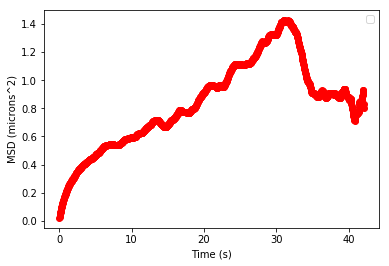

In [48]:
pixel_size = 0.189 #Multiplying by 2 because image was 2x2 binned. This is for 40x on Motic. 
#You may need to adjust pixel size
CopolyTimes= np.arange(1,len(copolyMsd)+1)/frame_rate

##Saves the msds as a python file to be used later and as a csv text file for ease of access
#pickle.dump(times, open(save_to + '\\MSD\\times1.p' , 'wb'))
#np.savetxt(data_directory+'TimesMsd2.txt',np.transpose((msd)),delimiter=',')
## pickle.dump(video_number, open(save_to + '\\'+'video_number.p', 'wb')) ##this will save to the fps folder and keep overwriting...


mpld3.enable_notebook()

pylab.plot(CopolyTimes, copolyMsd,'ro')
#pylab.plot(times5, msd5,'ro')
#pylab.plot(times10, msd10,'ro')#Plot mean-squared displacement versus time with red filled circlesal
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');

(0, 12)

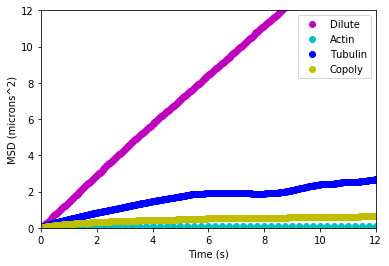

In [56]:
mpld3.enable_notebook()

pylab.plot(DiluteTimes, DiluteMsd,'mo', label='Dilute')
pylab.plot(ActinTimes, ActinMsd,'co', label='Actin')
pylab.plot(TubTimes, TubMsd,'bo', label='Tubulin')
pylab.plot(CopolyTimes, copolyMsd,'yo', label='Copoly')
#pylab.plot(times10, msd10,'yo', label='cutoff10')#Plot mean-squared displacement versus time with red filled circlesal
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
pylab.xlim(0,12)
pylab.ylim(0,12)
# pylab.savefig(data_directory+'MSDPlot.png')  

(0, 2)

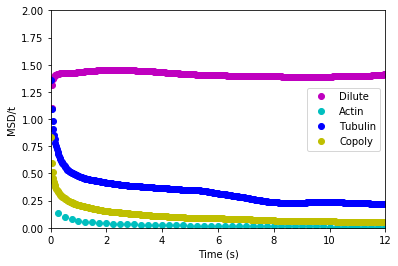

In [68]:
mpld3.enable_notebook()

pylab.plot(DiluteTimes, DiluteMsd/DiluteTimes,'mo', label='Dilute')
pylab.plot(ActinTimes, ActinMsd/ActinTimes,'co', label='Actin')
pylab.plot(TubTimes, TubMsd/TubTimes,'bo', label='Tubulin')
pylab.plot(CopolyTimes, copolyMsd/CopolyTimes,'yo', label='Copoly')
#pylab.plot(times10, msd10,'yo', label='cutoff10')#Plot mean-squared displacement versus time with red filled circlesal
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD/t');
pylab.xlim(0,12)
pylab.ylim(0,2)
# pylab.savefig(data_directory+'MSDPlot.png')  

(0.003749028587390649, 2)

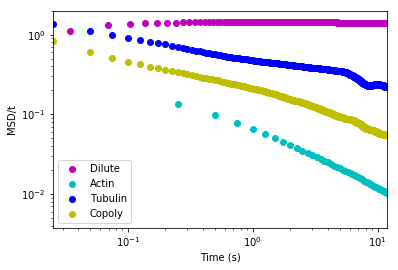

In [69]:
mpld3.enable_notebook()

pylab.loglog(DiluteTimes, DiluteMsd/DiluteTimes,'mo', label='Dilute')
pylab.plot(ActinTimes, ActinMsd/ActinTimes,'co', label='Actin')
pylab.plot(TubTimes, TubMsd/TubTimes,'bo', label='Tubulin')
pylab.plot(CopolyTimes, copolyMsd/CopolyTimes,'yo', label='Copoly')
#pylab.plot(times10, msd10,'yo', label='cutoff10')#Plot mean-squared displacement versus time with red filled circlesal
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD/t');
pylab.xlim(0,12)
pylab.ylim(0,2)
# pylab.savefig(data_directory+'MSDPlot.png')  

(0.01, 12)

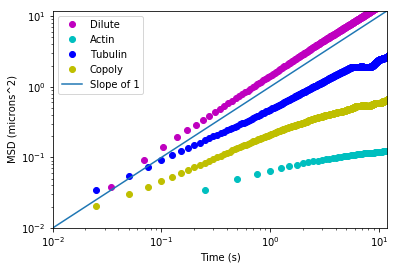

In [66]:
pylab.loglog(DiluteTimes, DiluteMsd,'mo', label='Dilute')
pylab.loglog(ActinTimes, ActinMsd,'co', label='Actin')
pylab.loglog(TubTimes, TubMsd,'bo', label='Tubulin')
pylab.loglog(CopolyTimes, copolyMsd,'yo', label='Copoly')
pylab.loglog([0,.01,1, 2, 3, 4,100], [0,.01,1, 2, 3, 4,100], label = "Slope of 1")
#pylab.plot(times10, msd10,'yo', label='cutoff10')#Plot mean-squared displacement versus time with red filled circlesal
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
pylab.xlim(0,12)
pylab.ylim(0,12)
# pylab.savefig(data_directory+'MSDPlot.png')  

In [104]:
np.savetxt(data_dir+'TimesMsd.txt',np.transpose((times,msd)),delimiter=',')
print times[-1]

11.325


0s to 5s
Found diffusion coeff D = 0.0036 (microns^2/s)
Alpha value: 0.3729 
Coefficient value: 0.061 
----------------
5s to 10s
Found diffusion coeff D = 0.0030 (microns^2/s)
Alpha value: 0.6142 
Coefficient value: 0.042 
----------------
5s to 14s
Found diffusion coeff D = 0.0031 (microns^2/s)
Alpha value: 0.6746 
Coefficient value: 0.037 
----------------
10s to 25s
Found diffusion coeff D = 0.0028 (microns^2/s)
Alpha value: 0.7349 
Coefficient value: 0.032 
----------------


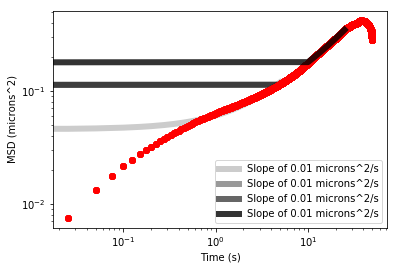

In [79]:
## Getting different diffusion coefficients for different time ranges 
## (0 to 5s, 0 to 10s, 10 to 50s, this is what sylas does)
mpld3.enable_notebook()

cutoff_start =[0,5,5,10]
cutoff_stop = [5,10,14,25]
DiffusionCoeffs = np.empty(len(cutoff_start))
AlphaValues = np.empty(len(cutoff_start))

for p in range(0, len(cutoff_start)):
    start = cutoff_start[p]
    stop = cutoff_stop[p]
   
    x = np.where(times >= start) ## returns indices
    y = np.where(times < stop) ## returns indices
    z = x[0][0]
    zz = y[0][(np.shape(y)[1]-1)]
    K = np.linspace(z,zz,zz-z+1)
    K = K.astype(int)
    
    pylab.loglog(times, msd,'ro') #Plot mean-squared displacement versus time with red filled circles
    linear_fit = np.polyfit(times[K][4:], msd[K][4:],1) #fit to polynomial of order 1 (i.e., a line)
    values_from_fit = np.polyval(linear_fit, np.hstack((np.array([0]),times[K]))) #evaluate polynomial
    pylab.loglog(np.hstack((np.array([0]),times[K])), values_from_fit,
             '-k', lw=6, alpha= .2*(p+1), label = r"Slope of %.2f microns^2/s" % linear_fit[0])
   
    print str(start)+'s to ' + str(stop) + 's'
   # print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##not sure what this is...is it correct?
    print "Found diffusion coeff D = %.4f (microns^2/s)" % (0.25*linear_fit[0])
    DiffusionCoeffs[p]=0.25*linear_fit[0]
    
    abc = np.where(times < stop)
    efg = np.where(times >= start)
    end = abc[0][-1]
    begin = efg[0][0]
    if (begin < 4):
        begin = 4
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
    else:
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
       
    AlphaValues[p]= alphapower
    print ("----------------")
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
   
pylab.savefig(data_directory+'\\MSDLogLogPlot.png')  

In [106]:

#Some parameters...
kb = 1.38065e-23  #Boltzmann's constant
t = 298 #temperature in Kelvin
viscosity = 1.002e-3 #8.9e-4 # 1.002 mPa*s
radius = .5e-6
diffusion_coeff = (kb*t)/(6*np.pi*viscosity*radius)*1e6*1e6
est_radius = (kb*t)/(6*np.pi*viscosity*0.25*linear_fit[0]*1e-12)
print "Theoretical D : %.10f" %diffusion_coeff
print "Estimated radius (in nanometers): %.3f nm" % (est_radius*1e9)
print "Estimated diameter (in micrometer): %.3f um" % (est_radius*1e6*2)

Theoretical D : 0.4356733673
Estimated radius (in nanometers): 134.094 nm
Estimated diameter (in micrometer): 0.268 um


In [107]:
pickle.dump(DiffusionCoeffs, open(data_directory + '\\D.p', 'wb'))
pickle.dump(AlphaValues, open(data_directory + '\\AlphaValues.p', 'wb'))